In [3]:
import matplotlib.pyplot as plt
import pydicom as pyd
import SimpleITK as sitk
import os
import numpy as np
import cv2
from skimage.transform import resize
from PIL import Image
import pandas as pd

In [4]:
#pbase = "/home/usuario/Documents/breast_cancer_imaging/DBT_challenge01/manifest-1605042674814/Breast-Cancer-Screening-DBT/"
#path2 = "/home/usuario/Documents/breast_cancer_imaging/DBT_challenge01/manifest-1605042674814/png/256/"
#path3 = "/home/usuario/Documents/breast_cancer_imaging/DBT_challenge01/manifest-1605042674814/png/512/"

pbase = "/home/gustavogarzon/mini_datasets/breast/Breast-Cancer-Screening-DBT/"
path2 = "/home/gustavogarzon/mini_datasets/breast/png/256/"
path3 = "/home/gustavogarzon/mini_datasets/breast/png/512/"

c=0
for f in os.listdir(pbase):
    #print(f)
    for f2 in os.listdir(pbase+f):
        #print("\t",f2)
        for f3 in os.listdir(pbase+f+"/"+f2):
            #print("\t\t",f3)
            for file in os.listdir(pbase+f+"/"+f2+"/"+f3):
                #print("\t\t\t",file)
                c=c+1
                newfile = f+"_"+f3+".png"
                print(str(c)+"/101", newfile)
                path = pbase+f+"/"+f2+"/"+f3+"/"+file
                image = np.array(sitk.GetArrayFromImage(sitk.ReadImage(path)))
                s = int(image.shape[0]/2)

                window = 630 #approx
                level = 510
                vmin = level - window/2
                vmax = level + window/2

                img2 = Image.fromarray(image[s,:,:]).resize((int(256/(image[0,:,:].shape[0]/image[0,:,:].shape[1])),256))
                b = np.zeros((256,256-int(256/(image[0,:,:].shape[0]/image[0,:,:].shape[1]))))
                new_p = Image.fromarray(np.hstack((img2,b)))
                #plt.imshow(new_p, cmap="gray", vmin=vmin, vmax=vmax)
                plt.imsave(path2+newfile, new_p, cmap="gray", vmin=vmin, vmax=vmax)

                img2 = Image.fromarray(image[s,:,:]).resize((int(512/(image[0,:,:].shape[0]/image[0,:,:].shape[1])),512))
                b = np.zeros((512,512-int(512/(image[0,:,:].shape[0]/image[0,:,:].shape[1]))))
                new_p = Image.fromarray(np.hstack((img2,b)))
                #plt.imshow(new_p, cmap="gray", vmin=vmin, vmax=vmax)
                plt.imsave(path3+newfile, new_p, cmap="gray", vmin=vmin, vmax=vmax)
#print(c)

1/101 DBT-P00128_22028.000000-NA-60942.png
2/101 DBT-P00128_22027.000000-NA-53436.png
3/101 DBT-P00128_22029.000000-NA-32173.png
4/101 DBT-P00128_22030.000000-NA-92234.png
5/101 DBT-P00029_229.000000-NA-39407.png
6/101 DBT-P00029_232.000000-NA-42826.png
7/101 DBT-P00029_230.000000-NA-30080.png
8/101 DBT-P00029_231.000000-NA-99185.png
9/101 DBT-P00113_21885.000000-NA-00088.png
10/101 DBT-P00113_21888.000000-NA-05060.png
11/101 DBT-P00113_21887.000000-NA-83283.png
12/101 DBT-P00113_21886.000000-NA-09498.png
13/101 DBT-P00064_20257.000000-NA-89476.png
14/101 DBT-P00064_20256.000000-NA-46869.png
15/101 DBT-P00064_20258.000000-NA-36685.png
16/101 DBT-P00064_20259.000000-NA-80607.png
17/101 DBT-P00023_19711.000000-NA-14072.png
18/101 DBT-P00023_19712.000000-NA-09387.png
19/101 DBT-P00023_19713.000000-NA-61579.png
20/101 DBT-P00023_19710.000000-NA-51654.png
21/101 DBT-P00130_21223.000000-NA-97850.png
22/101 DBT-P00130_21224.000000-NA-68917.png
23/101 DBT-P00130_21225.000000-NA-02686.png
24/10

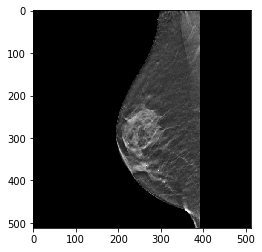

In [291]:
#path = "/home/usuario/Videos/1-1.dcm"
path = "/home/gustavogarzon/1-1.dcm"

image = np.array(sitk.GetArrayFromImage(sitk.ReadImage(path)))
s = int(image.shape[0]/2)

window = 630 #approx
level = 510
vmin = level - window/2
vmax = level + window/2

img2 = Image.fromarray(image[s,:,:]).resize((int(256/(image[0,:,:].shape[0]/image[0,:,:].shape[1])),256))
b = np.zeros((256,256-int(256/(image[0,:,:].shape[0]/image[0,:,:].shape[1]))))
new_p = Image.fromarray(np.hstack((img2,b)))
#plt.imshow(new_p, cmap="gray", vmin=vmin, vmax=vmax)
plt.imsave("prueba256.png", new_p, cmap="gray", vmin=vmin, vmax=vmax)

img2 = Image.fromarray(image[s,:,:]).resize((int(512/(image[0,:,:].shape[0]/image[0,:,:].shape[1])),512))
b = np.zeros((512,512-int(512/(image[0,:,:].shape[0]/image[0,:,:].shape[1]))))
new_p = Image.fromarray(np.hstack((img2,b)))
#plt.imshow(new_p, cmap="gray", vmin=vmin, vmax=vmax)
plt.imsave("prueba512.png", new_p, cmap="gray", vmin=vmin, vmax=vmax)

<br><br><br>

In [ ]:
path = "/home/gustavogarzon/Downloads/breast-image-datasets/archive/jpeg/"
path2 = "/home/gustavogarzon/Downloads/breast-image-datasets/archive/png/256/"
path3 = "/home/gustavogarzon/Downloads/breast-image-datasets/archive/png/512/"

#os.listdir(path)

In [ ]:
d = pd.read_csv("/home/gustavogarzon/Downloads/breast-image-datasets/archive/csv/meta.csv")
fmi = d[d["SeriesDescription"]=="full mammogram images"]["SeriesInstanceUID"]
#print(fmi.shape[0])
#print(fmi.iloc[3102])
print(fmi.head())

In [ ]:
for i in range(fmi.shape[0]):
    print(str(i+1)+"/"+str(fmi.shape[0]),fmi.iloc[i])
    for file in os.listdir(path+fmi.iloc[i]):
        #print(file)
        img = Image.open(path+fmi.iloc[i]+"/"+file)
        #print(int(256/(img.size[1]/img.size[0])))
        img2 = img.resize((int(256/(img.size[1]/img.size[0])),256))
        #print(np.array(img2).shape)
        b = np.zeros((256,256-int(256/(img.size[1]/img.size[0]))))
        #plt.imshow(np.hstack((img2,b)), cmap="gray")
        new_p = Image.fromarray(np.hstack((img2,b)))
        new_p = new_p.convert("L")
        new_p.save(path2+fmi.iloc[i]+"_"+file)
        
        img2 = img.resize((int(512/(img.size[1]/img.size[0])),512))
        #print(np.array(img2).shape)
        b = np.zeros((512,512-int(512/(img.size[1]/img.size[0]))))
        #plt.imshow(np.hstack((img2,b)), cmap="gray")
        new_p = Image.fromarray(np.hstack((img2,b)))
        new_p = new_p.convert("L")
        new_p.save(path3+fmi.iloc[i]+"_"+file)
        #print(folder, file, os.path.getsize(path+folder+"/"+file), np.array(img).shape[0], np.array(img).shape[1])
        #break
    #break

In [ ]:
pathbase = "/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad"
path2 = "/home/gustavogarzon/Downloads/breast-image-datasets/birad/png/256/"
path3 = "/home/gustavogarzon/Downloads/breast-image-datasets/birad/png/512/"

#os.listdir(path)

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC000541_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC000541_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC000541_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC000541_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC001201_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC001201_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC001201_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC001201_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC001782_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC001782_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009061_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009061_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009061_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009321_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009321_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009321_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009321_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009903_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009903_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC009903_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010781_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010801_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010801_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010801_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010801_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010821_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010821_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010821_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010821_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC010841_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011201_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011201_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011201_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011201_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011202_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011202_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011202_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011202_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011221_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011221_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011621_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011641_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011641_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011641_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011641_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011661_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011661_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011661_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011661_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2013_BC011681_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003141_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003182_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003182_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003182_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003182_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003202_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003202_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003202_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003202_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC003261_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012083_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012083_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012083_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012083_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012121_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012121_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012121_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012121_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012261_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2014_BC012261_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010081_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010081_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010161_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010161_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010161_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010161_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010262_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010262_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010262_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC010262_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016541_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016544_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016544_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016544_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016544_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016581_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016581_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016581_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016581_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2016_BC016601_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020361_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020361_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020421_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020421_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020441_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020441_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020441_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020441_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020501_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC0020501_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/bira

ix 608
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012381_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012381_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012381_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012381_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012781_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012781_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012781_ MLO_L.jpg
ix 408
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012781_ MLO_R.jpg
ix 632
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012864_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC012864_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-da

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019801_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019801_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019801_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019802_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019802_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019802_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019802_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019822_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019822_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2017_BC019863_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021401_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021401_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021421_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021421_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021421_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021421_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021442_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021442_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021442_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021442_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/bi

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021868_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021868_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021868_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021868_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021883_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021883_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021885_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021885_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021885_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0021885_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/bir

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022341_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022361_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022361_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022361_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022361_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022381_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022381_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022381_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022381_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0022441_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/bir

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023146_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023146_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023146_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023146_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023161_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023161_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023161_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023161_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023261_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023261_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/bira

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023889_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023889_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023901_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023901_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023901_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0023901_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0024062_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0024062_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0024062_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC0024062_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/bi

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009782_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009782_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009782_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009782_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009804_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009804_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009804_ MLO_L.jpg
ix 408
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009804_ MLO_R.jpg
ix 728
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009921_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC009921_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC017701_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC017701_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC018121_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC018121_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC018121_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC018121_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC018303_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC018303_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC018303_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2018_BC018303_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022062_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022062_ MLO_L.jpg
ix 408
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022062_ MLO_R.jpg
ix 600
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022341_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022341_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022341_ MLO_L.jpg
ix 408
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022341_ MLO_R.jpg
ix 568
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022361_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022361_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0022361_ MLO_L.jpg
ix 408
/home/gustavogarzon/

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025542_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025542_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025542_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025641_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025641_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025641_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025641_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025642_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025642_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC0025642_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/bir

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC017301_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC017944_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC017944_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC017944_ MLO_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC017944_ MLO_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC018121_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC018121_ CC_R.jpg
ix 512
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC018121_ MLO_L.jpg
ix 408
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC018121_ MLO_R.jpg
ix 504
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad1/b1/ 2019_BC019102_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-d

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC0020781_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC0020781_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC0020781_ MLO_R.jpg
ix 576
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC005781_ CC_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC005781_ CC_R.jpg
ix 536
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC005781_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC005781_ MLO_R.jpg
ix 504
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC006222_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC006222_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2017_BC006222_ MLO_L.jpg
ix 400
/home/gustavo

ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021502_ MLO_R.jpg
ix 560
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021603_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021603_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021603_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021603_ MLO_R.jpg
ix 656
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021643_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021643_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021643_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021643_ MLO_R.jpg
ix 608
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0021663_ CC_L.jpg
/home/gustavo

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022261_ MLO_R.jpg
ix 584
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022461_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022461_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022461_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022461_ MLO_R.jpg
ix 608
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022502_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022502_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022502_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022502_ MLO_R.jpg
ix 680
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2018_BC0022661_ CC_L.jpg
/home/gustavogarzon/

ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0024704_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0024704_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0024704_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0024704_ MLO_R.jpg
ix 632
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0025182_ MLO_R.jpg
ix 600
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0025182_ MLO_R_1.jpg
ix 600
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0025381_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0025381_ CC_R.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0025381_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad3/b3/ 2019_BC0025381_ MLO_R.jpg
ix 552
/ho

/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021723_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021724_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021724_ CC_R.jpg
ix 576
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021724_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021724_ MLO_R.jpg
ix 568
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021731_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021731_ MLO_L.jpg
ix 400
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021735_ CC_L.jpg
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021735_ CC_R.jpg
ix 528
/home/gustavogarzon/Downloads/breast-image-datasets/birad/Birad4/b4/ 2018_BC0021735_ MLO_L.jpg
ix 400
/home/

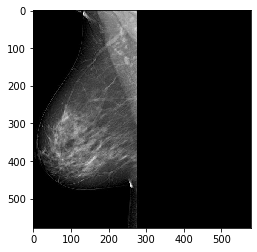

In [250]:
lista_br = ["1","3","4","5"]
#lista_br = ["4"]
for br in lista_br:
    if br != "5":
        pathb = pathbase+br+"/b"+br+"/"
    else:
        pathb = pathbase+br+"/Birad"+br+"/"
    for file in os.listdir(pathb):
        print(pathb, file)
        img = Image.open(pathb+file).convert("L")
        #nn = (file.split(".")[0]+"_b"+br+"."+file.split(".")[1]).replace(" ", "")
        nn = (file.split(".")[0]+"_b"+br+"."+"png").replace(" ", "")
        if (img.size[1]>img.size[0]):
            img2 = img.resize((int(256/(img.size[1]/img.size[0])),256)).convert("L")
            b = np.zeros((256,256-int(256/(img.size[1]/img.size[0]))))
            ##plt.imshow(img2, cmap="gray")
            new_p = Image.fromarray(np.hstack((img2,b))).convert("L")
            new_p.save(path2+nn)
            
            img2 = img.resize((int(512/(img.size[1]/img.size[0])),512)).convert("L")
            b = np.zeros((512,512-int(512/(img.size[1]/img.size[0]))))
            new_p = Image.fromarray(np.hstack((img2,b))).convert("L")
            new_p.save(path3+nn)
            #a = True
        else:
            #print(img.size)
            ho = np.array(img).shape[0]
            nh = np.array(img)[np.nonzero(np.sum(np.array(img), axis=1))[0][0]:,:].shape[0]
            ix = np.nonzero(np.sum(np.array(img), axis=0))[0][0]
            hx = np.nonzero(np.sum(np.array(img), axis=1))[0][0]
            
            if nh<512:
                #print("IMAGEN ALARGADA")
                #plt.imshow(np.array(img)[ho-512:,ix:ix+512]) #512
                img2 = Image.fromarray(np.array(img)[ho-512:,ix:ix+512]).convert("L")
                img2.save(path3+nn)
                #plt.imshow(np.array(img)[hx:,ix:ix+nh]) #256
                img2 = Image.fromarray(np.array(img)[hx:,ix:ix+nh]).resize((256,256)).convert("L")
                img2.save(path2+nn)

            else:
                print("ix",ix)
                plt.imshow(np.array(img)[hx:, ix:ix+ho], cmap="gray")
                img2 = Image.fromarray(np.array(img)[hx:, ix:ix+ho]).resize((512,512)).convert("L")
                img2.save(path3+nn)
                img2 = Image.fromarray(np.array(img)[hx:, ix:ix+ho]).resize((256,256)).convert("L")
                img2.save(path2+nn)

            #img2 = img.resize((int(256/(img.size[1]/img.size[0])),256)).convert("L")
            #ifrom = np.nonzero(np.array(img2)[int(img2.size[1]/2)])[0][0]
            #plt.imshow(np.array(img2)[:,ifrom:ifrom+256], cmap="gray")
            #new_p = Image.fromarray(np.array(img2)[:,ifrom:ifrom+256]).convert("L")
            #new_p.save(path2+nn)
            
            #img2 = img.resize((int(512/(img.size[1]/img.size[0])),512)).convert("L")
            #ifrom = np.nonzero(np.array(img2)[int(img2.size[1]/2)])[0][0]
            #plt.imshow(np.array(img2)[:,ifrom:ifrom+512], cmap="gray")
            #new_p = Image.fromarray(np.array(img2)[:,ifrom:ifrom+512]).convert("L")
            #new_p.save(path3+nn)
            #break

        #break
    #break